# Breast Cancer Detection Project

Breast cancer is one of the most common cancers affecting women worldwide. Early detection of breast cancer is crucial for improving treatment outcomes and survival rates. In this project, we aim to develop a machine learning model to accurately detect breast cancer using two popular classification algorithms: Support Vector Machine (SVM) and K-Nearest Neighbors (KNN). 

The dataset used in this project includes features extracted from breast cancer histopathology images, which are used to train and evaluate the performance of our models. By comparing the accuracy, precision, recall, and other relevant metrics of SVM and KNN classifiers, we can determine the most effective approach for breast cancer detection. 

This project will be implemented in a Jupyter Notebook, providing a step-by-step guide to data preprocessing, model training, evaluation, and visualization of results. The ultimate goal is to create a reliable tool that can assist healthcare professionals in the early diagnosis of breast cancer, thereby improving patient outcomes.

<div style="text-align: center;">
    <img src="download.png" alt="Breast Cancer Detection" width="600"/>
</div>


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from pyforest import *
lazy_imports()

['from sklearn.ensemble import RandomForestClassifier',
 'from sklearn.linear_model import ElasticNetCV',
 'from statsmodels.tsa.arima_model import ARIMA',
 'import matplotlib.pyplot as plt',
 'import numpy as np',
 'import altair as alt',
 'import os',
 'import matplotlib as mpl',
 'from sklearn.linear_model import LassoCV',
 'import fastai',
 'import imutils',
 'import textblob',
 'import torch',
 'from scipy import signal as sg',
 'import bokeh',
 'from pyspark import SparkContext',
 'import pandas as pd',
 'from sklearn.model_selection import StratifiedKFold',
 'from sklearn.linear_model import Ridge',
 'import dash',
 'from sklearn.preprocessing import MinMaxScaler',
 'import skimage',
 'import spacy',
 'import plotly as py',
 'from xlrd import open_workbook',
 'import nltk',
 'from sklearn.ensemble import RandomForestRegressor',
 'from sklearn.preprocessing import StandardScaler',
 'import sklearn',
 'from openpyxl import load_workbook',
 'from sklearn.preprocessing import Polyno

In [11]:
data=pd.read_csv("breastCancer.csv")

<IPython.core.display.Javascript object>

In [12]:
data

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [14]:
data.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Data Pre-Processsing

In [15]:
data['class'].value_counts()

class
2    458
4    241
Name: count, dtype: int64

# 2 for Benign and 4 for Malignant

In [17]:
data.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [18]:
data[data['bare_nucleoli']=='?']

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [21]:
df=data.replace('?',np.nan)

<IPython.core.display.Javascript object>

In [29]:
 df['bare_nucleoli'].value_counts()

bare_nucleoli
1     402
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: count, dtype: int64

In [31]:
df.describe()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [34]:
df.median()

id                   1171710.0
clump_thickness            4.0
size_uniformity            1.0
shape_uniformity           1.0
marginal_adhesion          1.0
epithelial_size            2.0
bare_nucleoli              1.0
bland_chromatin            3.0
normal_nucleoli            1.0
mitoses                    1.0
class                      2.0
dtype: object

In [35]:
df=df.fillna(df.median())

In [40]:
 df


,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [44]:
df['bare_nucleoli']

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: bare_nucleoli, Length: 699, dtype: object

In [45]:
data.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [46]:
df['bare_nucleoli']=df['bare_nucleoli'].astype('int64')

In [47]:
df

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [50]:
df.dtypes

id                   int64
clump_thickness      int64
size_uniformity      int64
shape_uniformity     int64
marginal_adhesion    int64
epithelial_size      int64
bare_nucleoli        int64
bland_chromatin      int64
normal_nucleoli      int64
mitoses              int64
class                int64
dtype: object

In [51]:
# now all the columns have integer data types

# Exploratory Data Analysis

In [55]:
df.drop(['id'],axis=1,inplace=True)

In [56]:
df

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [61]:
df.describe().T # 5-number summary of the data set

,count,mean,std,min,25%,50%,75%,max
clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nucleoli,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


# Bivariate Data Analysis

<IPython.core.display.Javascript object>

C:\Users\hanzl\AppData\Local\Temp\ipykernel_8112\729556929.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['class'])


<Axes: xlabel='class', ylabel='Density'>

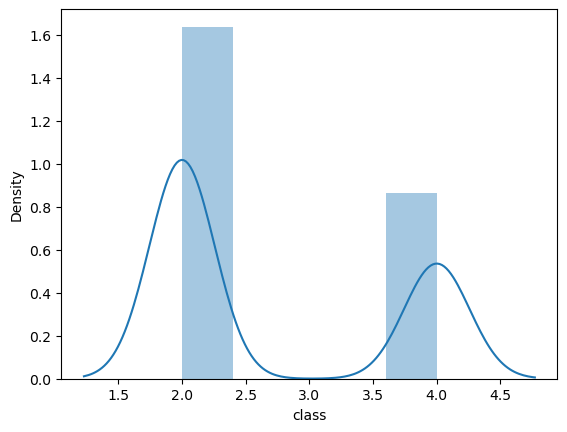

In [62]:
sns.distplot(df['class'])

# Multivariate Data Analysis 

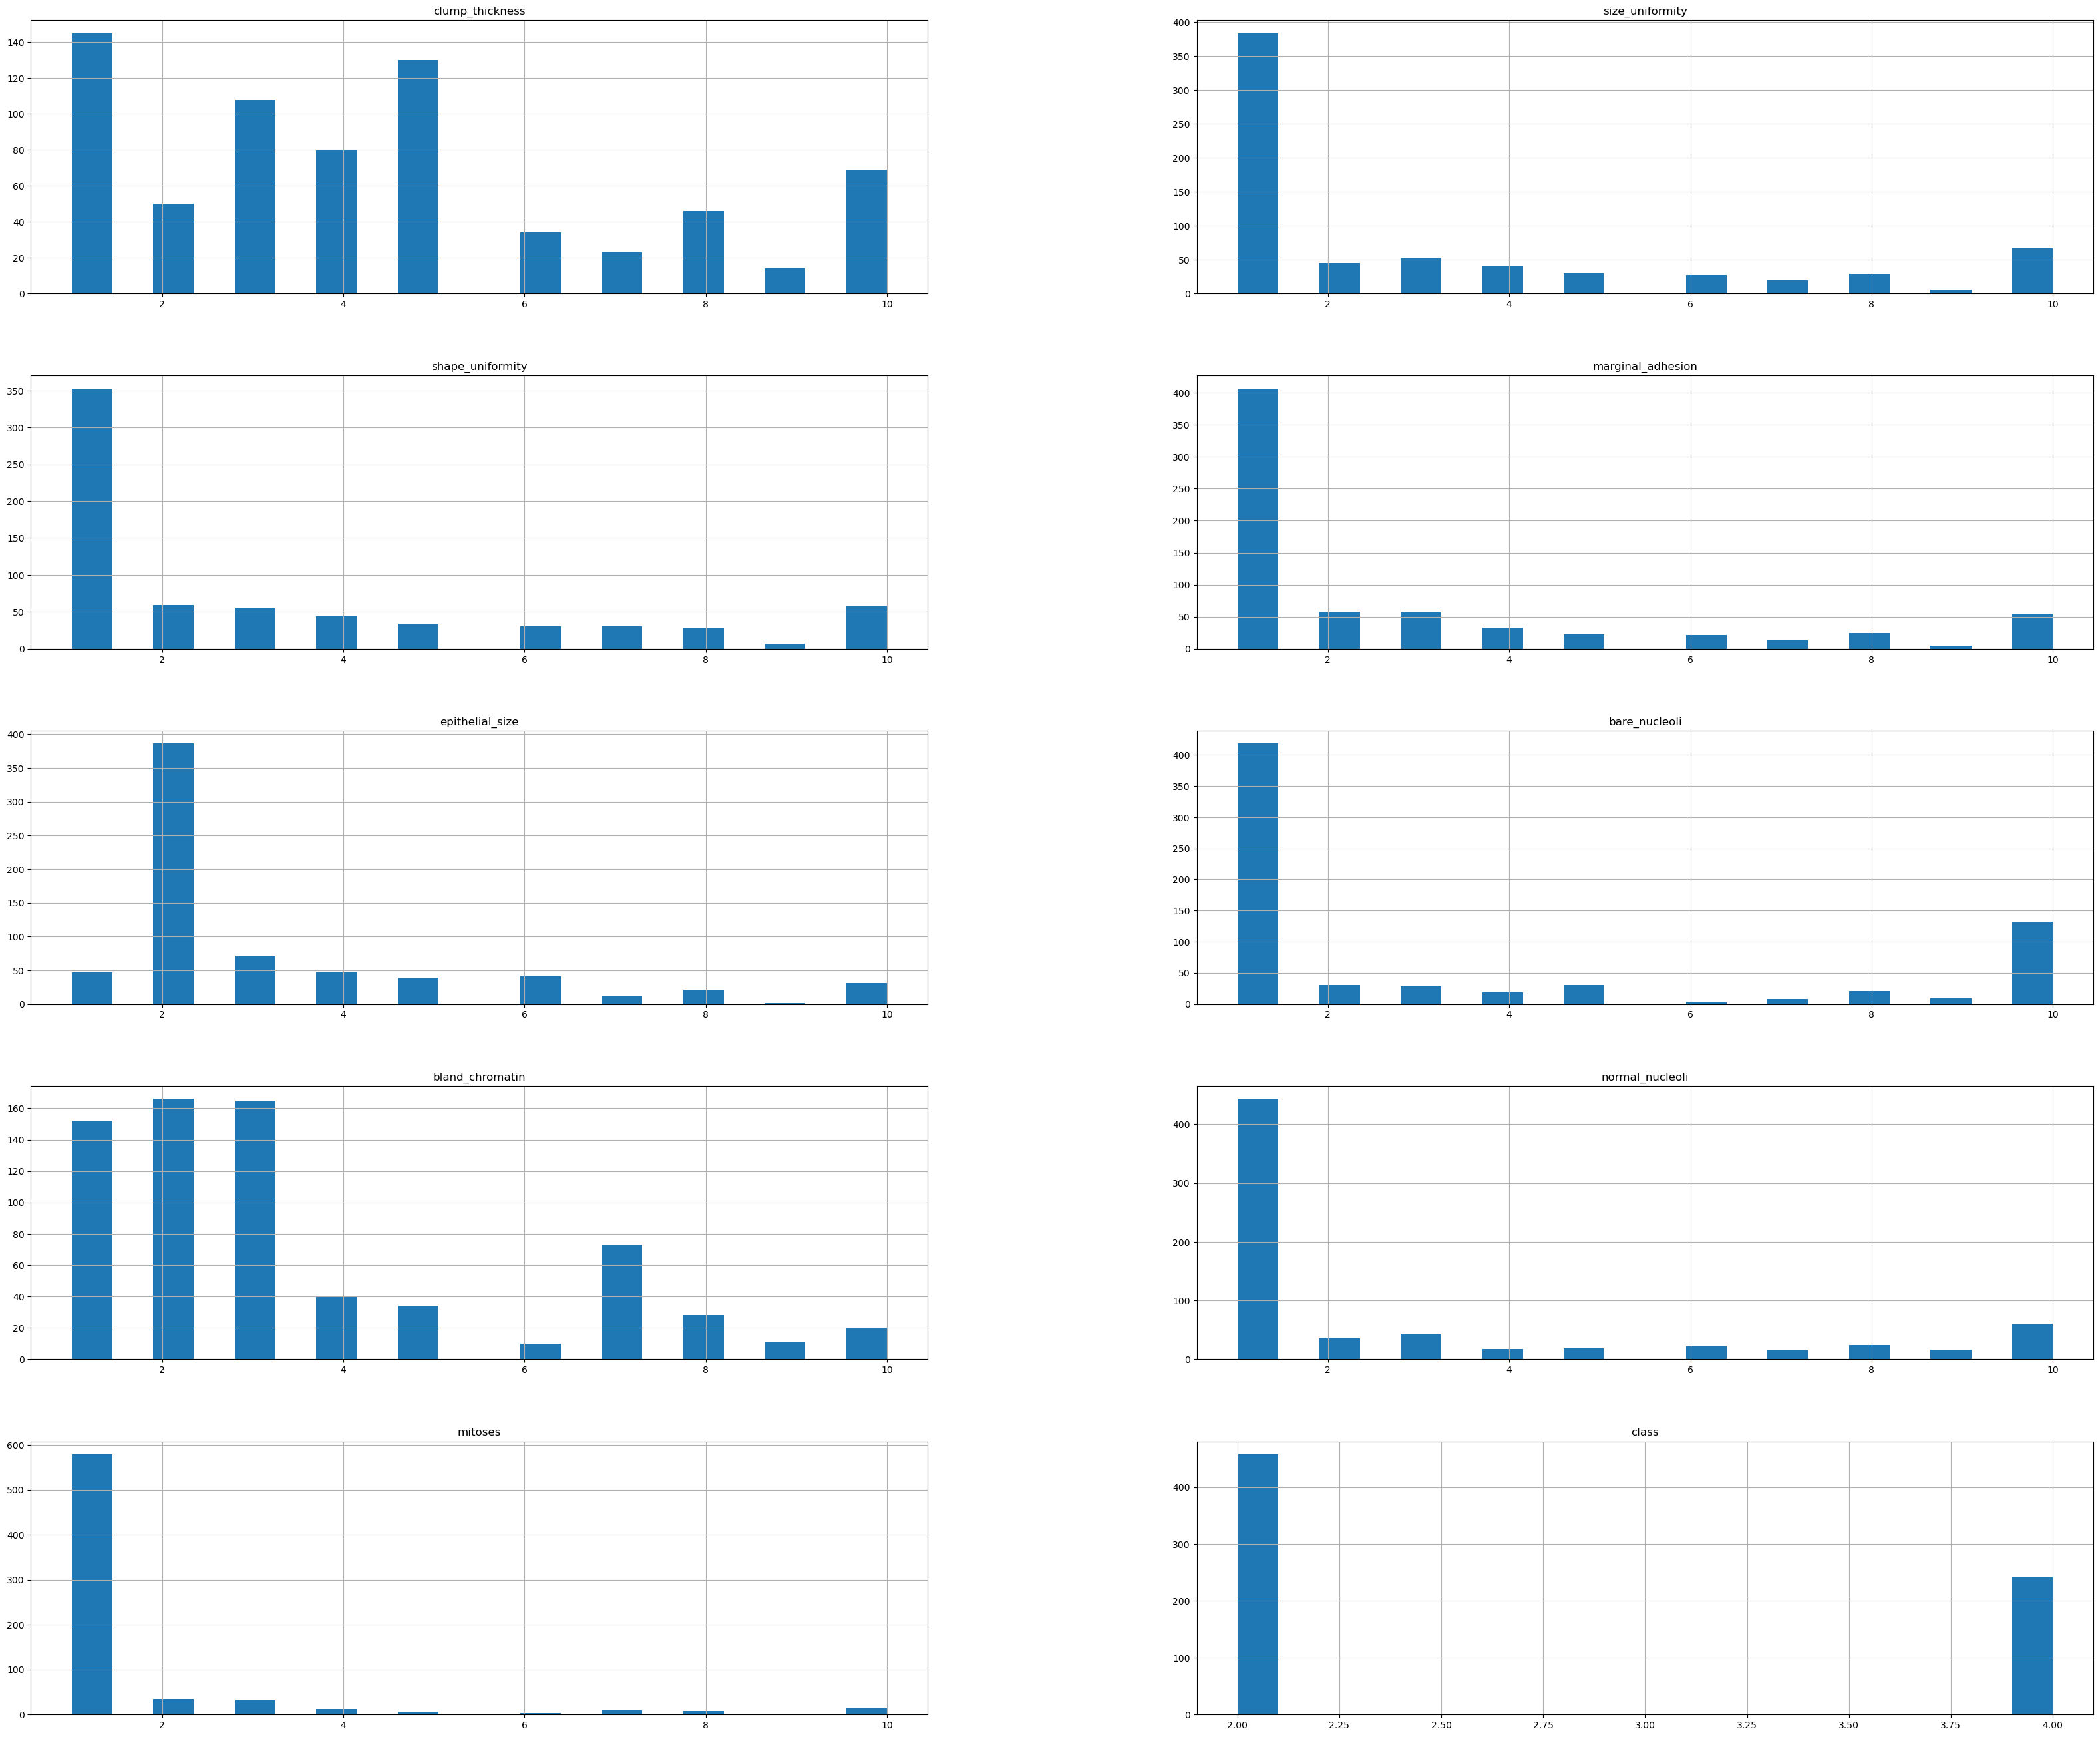

In [71]:
df.hist(bins=20, figsize=(40, 40), layout=(6, 2));


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

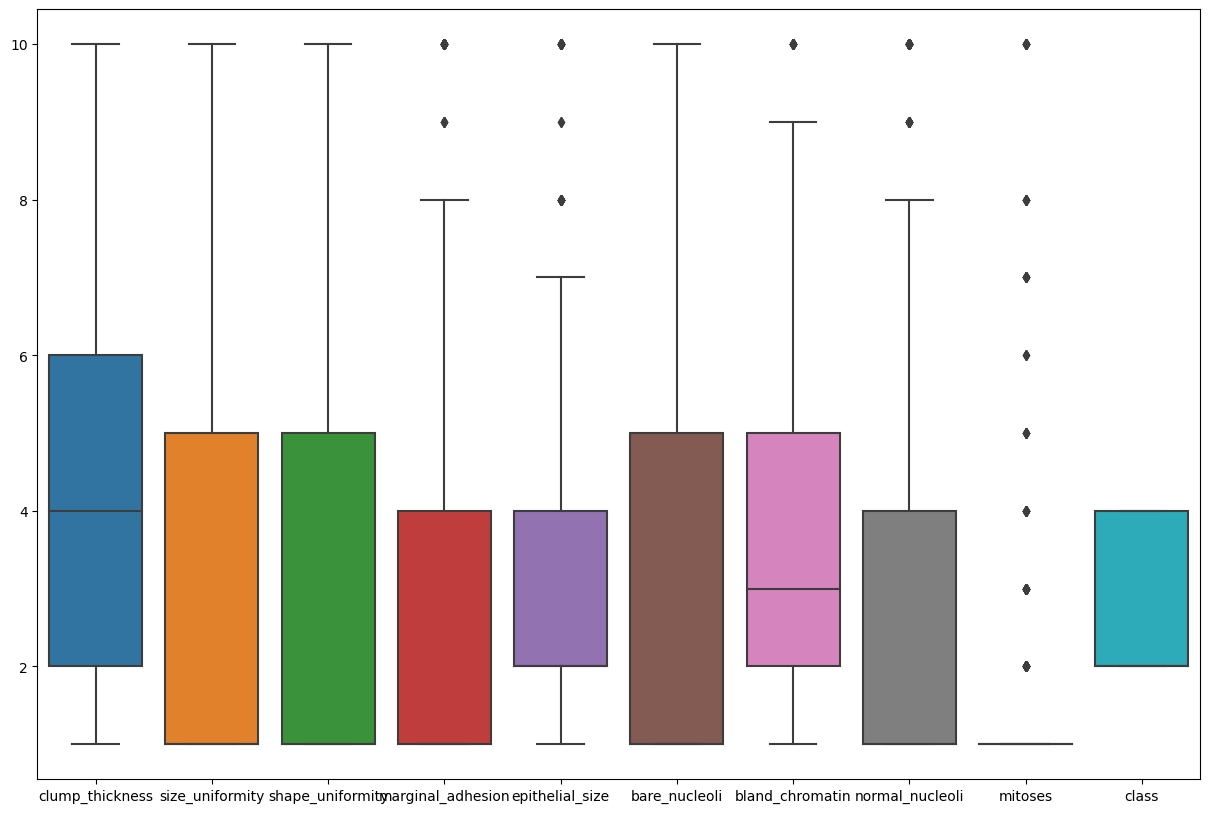

In [75]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)

In [76]:
df.corr()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
size_uniformity,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
shape_uniformity,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
bare_nucleoli,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

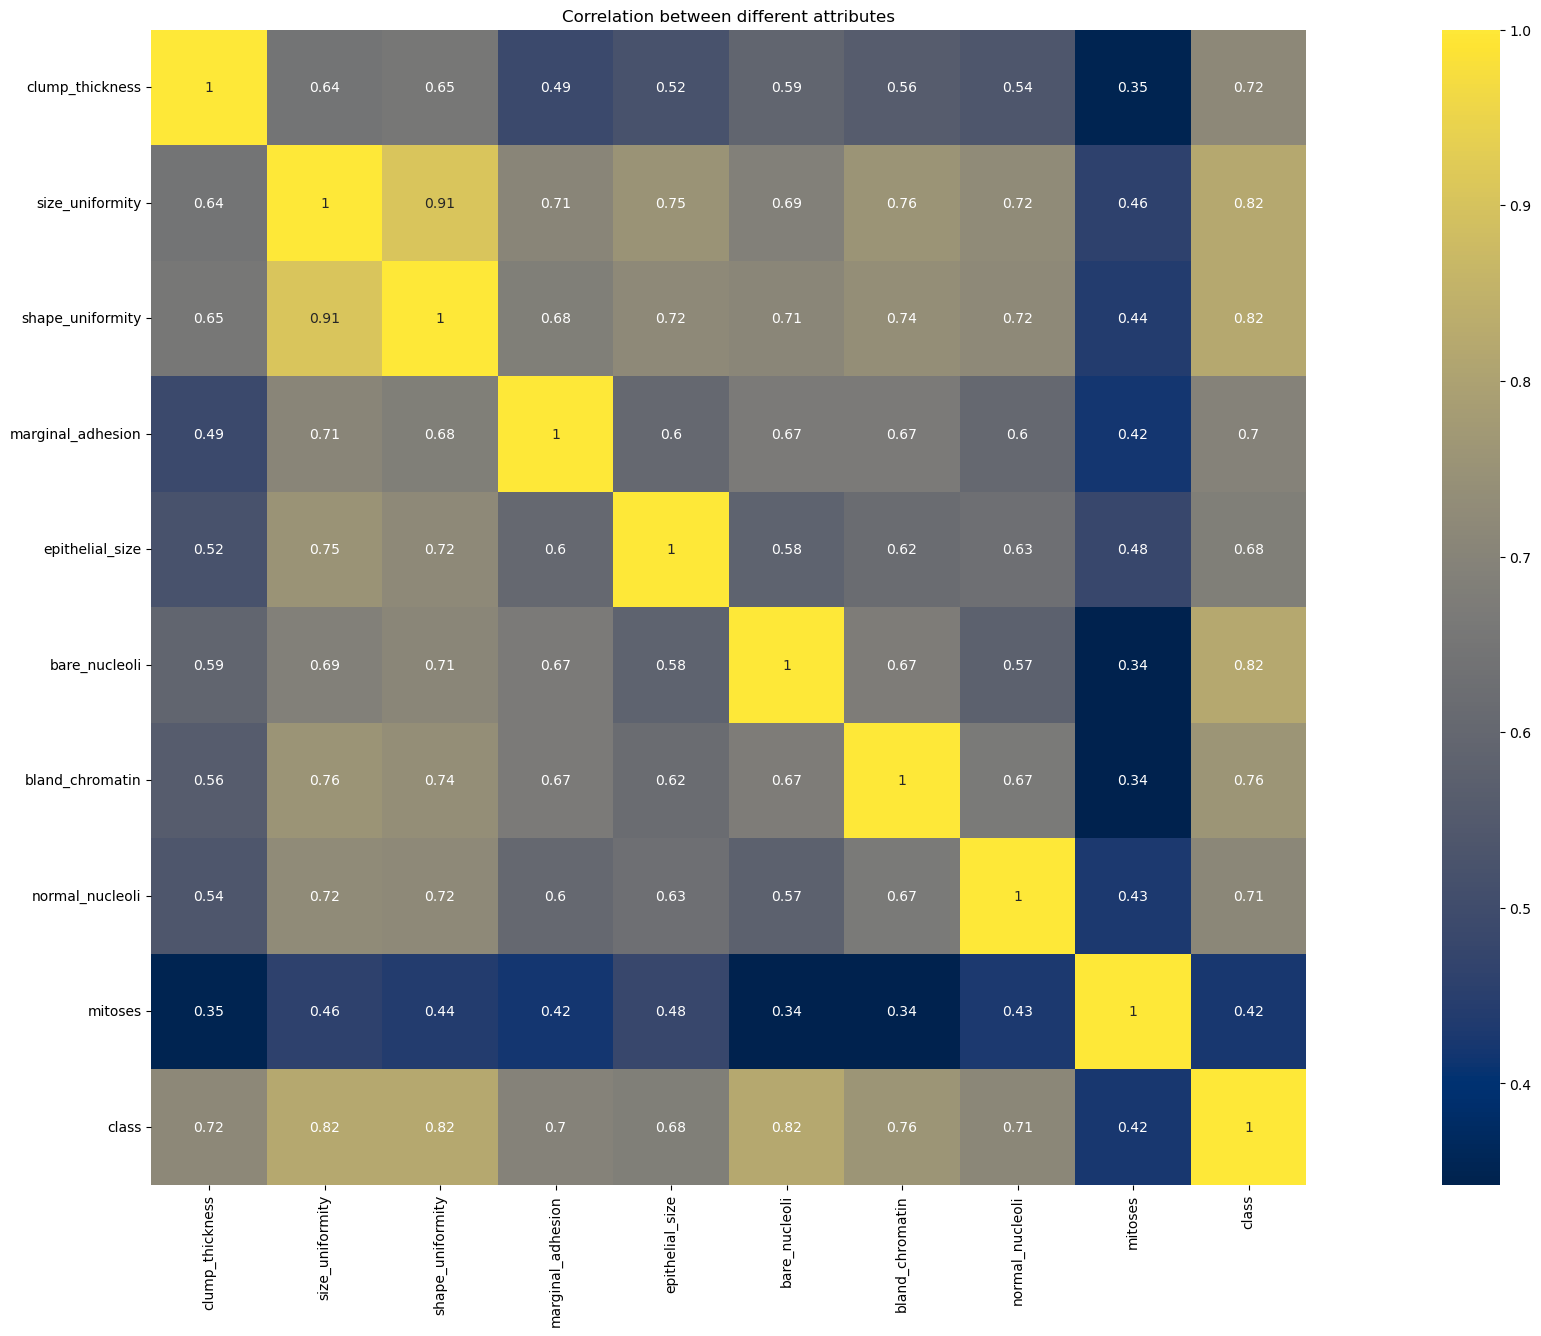

In [83]:
plt.figure(figsize=(35,15))
sns.heatmap(df.corr(),vmax=1,square=True,annot=True,cmap='cividis')
plt.title("Correlation between different attributes")
plt.show()

<IPython.core.display.Javascript object>

C:\Users\hanzl\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


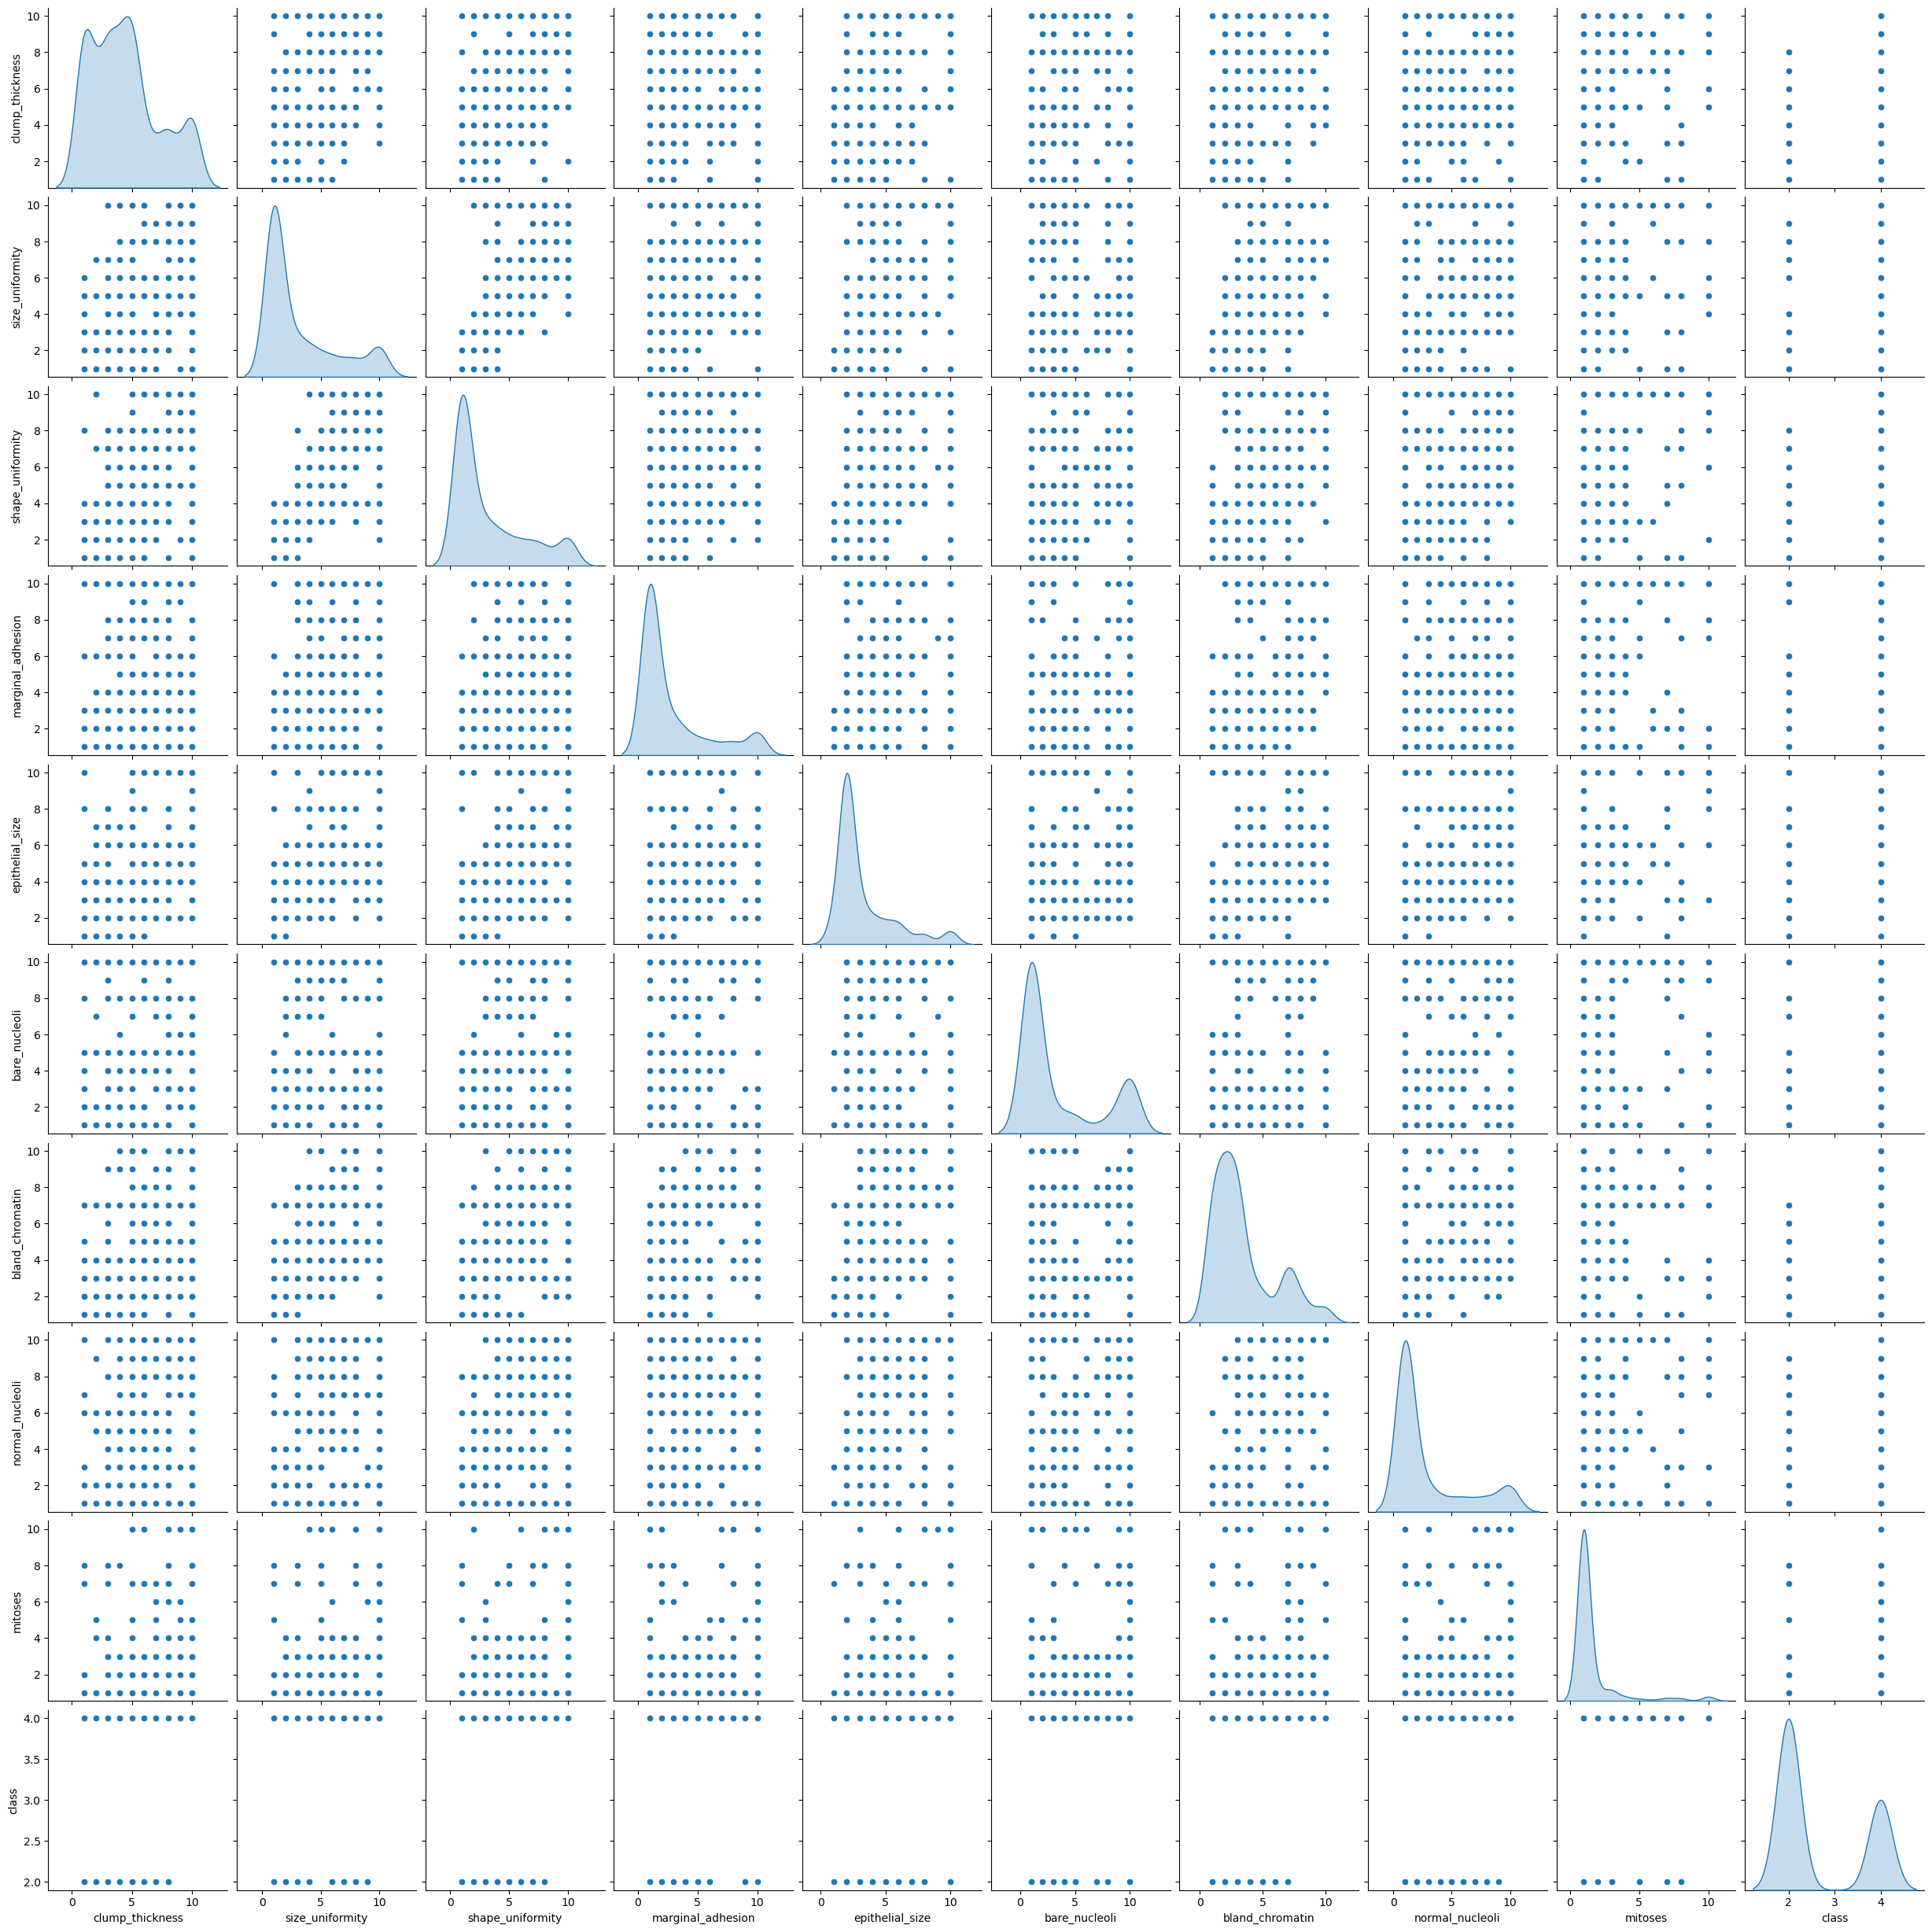

In [84]:
sns.pairplot(df,diag_kind="kde")

# Building our Model

In [87]:
X=df.drop('class',axis=1)
Y=df['class']

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train,X_test,Y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

# KneighboursClassifier

In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [96]:
KNN=KNeighborsClassifier(n_neighbors=5,weights='distance')

In [97]:
KNN.fit(X_train,Y_train)

KNeighborsClassifier(weights='distance')

In [98]:
predicted_1=KNN.predict(X_test)

In [99]:
predicted_1

array([2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4,
       4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2], dtype=int64)

In [100]:
X_test

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
584,5,1,1,6,3,1,1,1,1
417,1,1,1,1,2,1,2,1,1
606,4,1,1,2,2,1,1,1,1
349,4,2,3,5,3,8,7,6,1
134,3,1,1,1,3,1,2,1,1
...,...,...,...,...,...,...,...,...,...
440,10,4,3,10,4,10,10,1,1
299,9,1,2,6,4,10,7,7,2
577,1,1,1,1,2,1,2,1,1
103,8,2,3,1,6,3,7,1,1


In [102]:
from scipy.stats import zscore
print('KNN SCORE :',KNN.score(X_test,y_test)*100)

KNN SCORE : 97.61904761904762


# Support Vector Machine 

In [104]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,Y_train)

SVC()

In [105]:
predicted_2=svc.predict(X_test)

In [106]:
predicted_2

array([2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4,
       4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2], dtype=int64)

In [107]:
from scipy.stats import zscore
print('SVM SCORE :',svc.score(X_test,y_test)*100)

SVM SCORE : 98.09523809523809


In [108]:
knnpredictions=pd.DataFrame(predicted_1)
svmpredictions=pd.DataFrame(predicted_2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [111]:
df1=pd.concat([knnpredictions,svmpredictions],axis=1)

<IPython.core.display.Javascript object>

In [112]:
df1

,0,0
0,2,2
1,2,2
2,2,2
3,4,4
4,2,2
...,...,...
205,4,4
206,4,4
207,2,2
208,2,4


In [113]:
df1.columns=[['knnpredictions','svmpredictions']]

In [114]:
df1

,knnpredictions,svmpredictions
0,2,2
1,2,2
2,2,2
3,4,4
4,2,2
...,...,...
205,4,4
206,4,4
207,2,2
208,2,4


In [115]:
from sklearn.metrics import classification_report

In [120]:
print("KNN Classification Report")
print('..'*10)
classification_report(y_test,predicted_1)

KNN Classification Report
....................


'              precision    recall  f1-score   support\n\n           2       0.97      0.99      0.98       137\n           4       0.99      0.95      0.97        73\n\n    accuracy                           0.98       210\n   macro avg       0.98      0.97      0.97       210\nweighted avg       0.98      0.98      0.98       210\n'

In [122]:
print("KNN Classification Report")
 
classification_report(y_test,predicted_2)

KNN Classification Report


'              precision    recall  f1-score   support\n\n           2       0.99      0.99      0.99       137\n           4       0.97      0.97      0.97        73\n\n    accuracy                           0.98       210\n   macro avg       0.98      0.98      0.98       210\nweighted avg       0.98      0.98      0.98       210\n'

# Confusion Matrix for KNN

Confusion  Matrix for KNN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

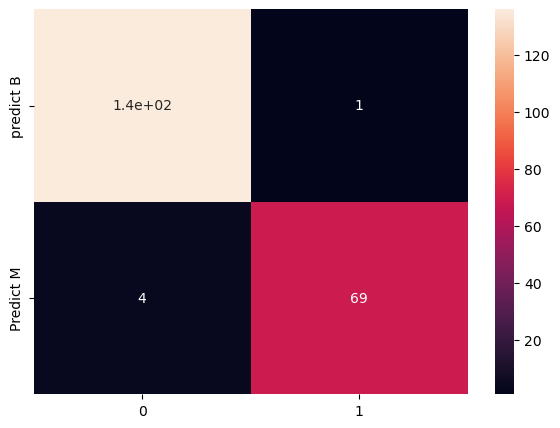

In [125]:
from sklearn import metrics
print("Confusion  Matrix for KNN")
cm=metrics.confusion_matrix(y_test,predicted_1,labels=[2,4])
df_cm=pd.DataFrame(cm,index=[i for i in ["predict B","Predict M"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True)

# Confusion Matrix for SVM

Confusion  Matrix for KNN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

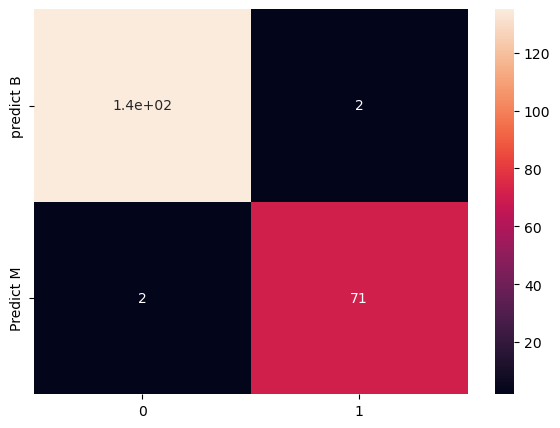

In [127]:
from sklearn import metrics
print("Confusion  Matrix for KNN")
cm=metrics.confusion_matrix(y_test,predicted_2,labels=[2,4])
df_cm=pd.DataFrame(cm,index=[i for i in ["predict B","Predict M"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True)